<font size="5">Problem Statement</font>


A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.


<font size="5">Importing basic libraries</font>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

<font size="5">Loading the Dataset</font>


In [2]:
data=pd.read_csv("E:\Dataset\customer_churn.csv")

In [3]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
data.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [5]:
#Checking the shape
data.shape

(900, 10)

In [6]:
#Checking for null values if any
data.isnull().values.any()


False

In [7]:
#Checking the descriptive statistics for the dataset
data.describe(include='all')

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
count,900,900.000000,900.000000,900.000000,900.000000,900.000000,900,900,900,900.000000
unique,899,NaN,NaN,NaN,NaN,NaN,900,900,873,NaN
top,Jennifer Wood,NaN,NaN,NaN,NaN,NaN,2016-02-12 22:38:03,"29954 Burns Lake Apt. 491 Lake Dana, KY 85990",Anderson Group,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,1,1,4,NaN
mean,NaN,41.816667,10062.824033,0.481111,5.273156,8.587778,NaN,NaN,NaN,0.166667
std,NaN,6.127560,2408.644532,0.499921,1.274449,1.764836,NaN,NaN,NaN,0.372885
min,NaN,22.000000,100.000000,0.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000
25%,NaN,38.000000,8497.122500,0.000000,4.450000,7.000000,NaN,NaN,NaN,0.000000
50%,NaN,42.000000,10045.870000,0.000000,5.215000,8.000000,NaN,NaN,NaN,0.000000
75%,NaN,46.000000,11760.105000,1.000000,6.110000,10.000000,NaN,NaN,NaN,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
Names              900 non-null object
Age                900 non-null float64
Total_Purchase     900 non-null float64
Account_Manager    900 non-null int64
Years              900 non-null float64
Num_Sites          900 non-null float64
Onboard_date       900 non-null object
Location           900 non-null object
Company            900 non-null object
Churn              900 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


<font size="5">Exploratory Data Analysis</font>


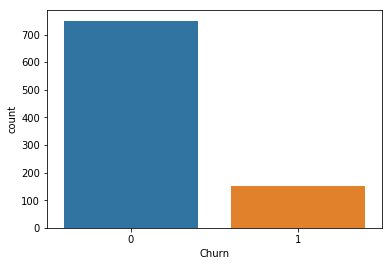

In [9]:
sns.countplot(x = 'Churn', data=data)
plt.show()

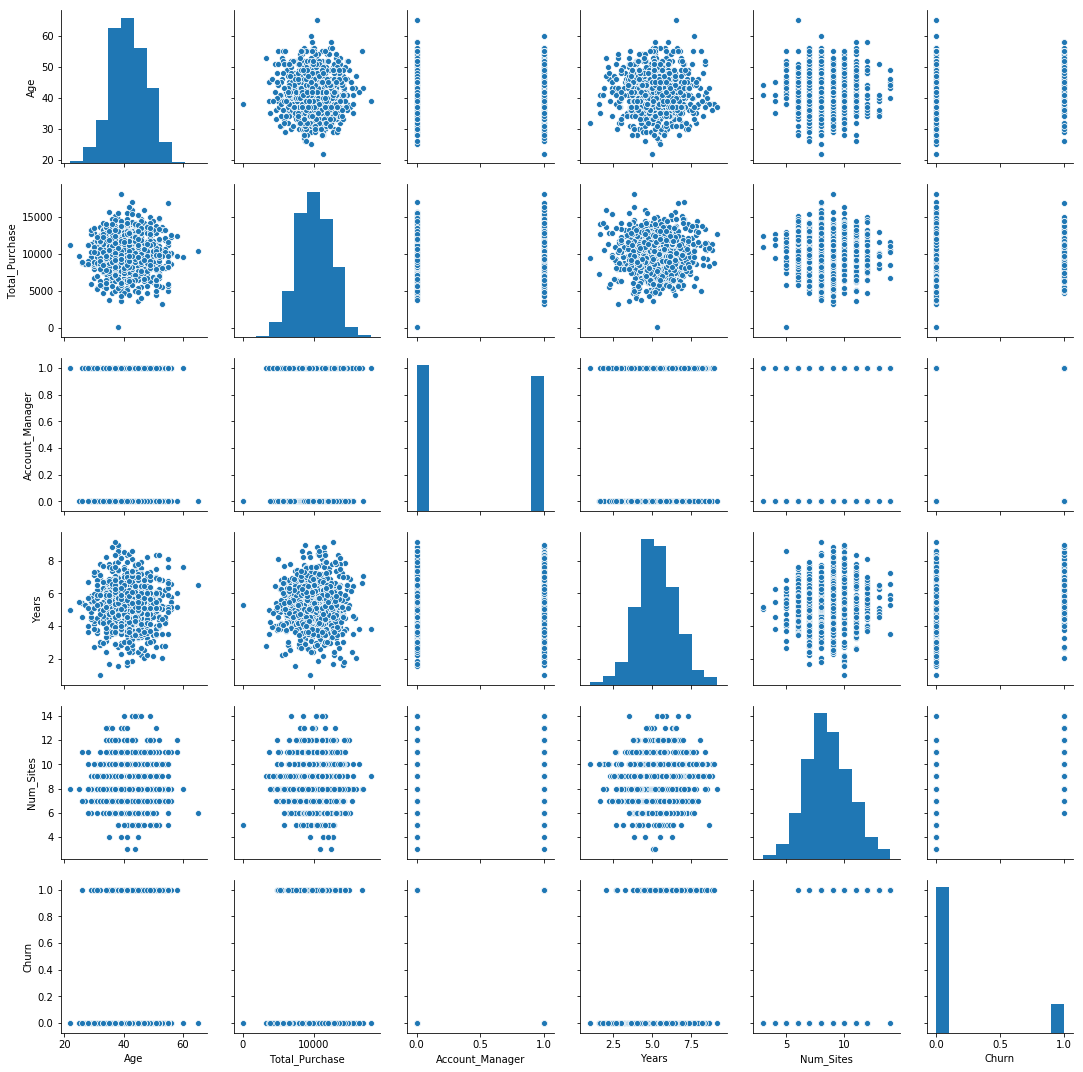

In [10]:
#Checking the distribution for each variable
sns.pairplot(data)

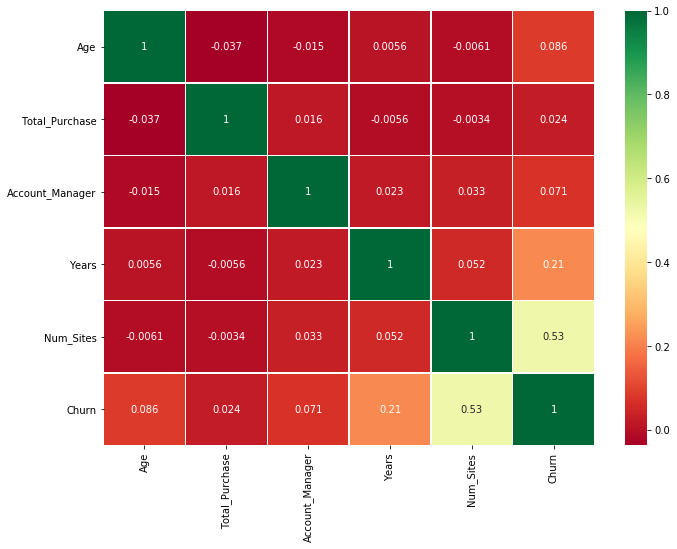

In [11]:
#Creating a heatmap to check the correlation between the variables
sns.heatmap(data.corr(method='pearson'), annot=True, cmap= 'RdYlGn', linewidths= 0.2)
fig= plt.gcf()
fig.set_size_inches(11,8)
plt.show()

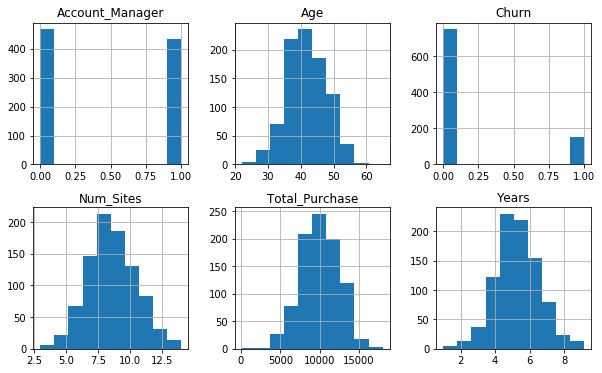

In [12]:
#Checking the distribution for each variable
data.hist(layout = (2, 3), figsize = (10, 6))
plt.show()

In [13]:
##Dropping the irrelevant features
data = data.drop(columns=['Location','Num_Sites'])


In [14]:
data.shape


(900, 8)

In [15]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Onboard_date,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,2013-08-30 07:00:40,Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,2013-08-13 00:38:46,Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,2016-06-29 06:20:07,"Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,2014-04-22 12:43:12,Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,2016-01-19 15:31:15,Love-Jones,1


In [16]:
#Seperating the date with time
data['year'] = pd.DatetimeIndex(data['Onboard_date']).year
data.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Onboard_date,Company,Churn,year
0,Cameron Williams,42.0,11066.80,0,7.22,2013-08-30 07:00:40,Harvey LLC,1,2013
1,Kevin Mueller,41.0,11916.22,0,6.50,2013-08-13 00:38:46,Wilson PLC,1,2013
2,Eric Lozano,38.0,12884.75,0,6.67,2016-06-29 06:20:07,"Miller, Johnson and Wallace",1,2016
3,Phillip White,42.0,8010.76,0,6.71,2014-04-22 12:43:12,Smith Inc,1,2014
4,Cynthia Norton,37.0,9191.58,0,5.56,2016-01-19 15:31:15,Love-Jones,1,2016


In [17]:
data.shape

(900, 9)

In [18]:
#Droping  the column 
data.drop(columns=['Onboard_date'])

,Names,Age,Total_Purchase,Account_Manager,Years,Company,Churn,year
0,Cameron Williams,42.0,11066.80,0,7.22,Harvey LLC,1,2013
1,Kevin Mueller,41.0,11916.22,0,6.50,Wilson PLC,1,2013
2,Eric Lozano,38.0,12884.75,0,6.67,"Miller, Johnson and Wallace",1,2016
3,Phillip White,42.0,8010.76,0,6.71,Smith Inc,1,2014
4,Cynthia Norton,37.0,9191.58,0,5.56,Love-Jones,1,2016
5,Jessica Williams,48.0,10356.02,0,5.12,Kelly-Warren,1,2009
6,Eric Butler,44.0,11331.58,1,5.23,Reynolds-Sheppard,1,2016
7,Zachary Walsh,32.0,9885.12,1,6.92,Singh-Cole,1,2006
8,Ashlee Carr,43.0,14062.60,1,5.46,Lopez PLC,1,2011
9,Jennifer Lynch,40.0,8066.94,1,7.11,Reed-Martinez,1,2006


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [21]:
#Assigning values to the variables
Y =data.Churn
features= ['Names','Age','Total_Purchase','Account_Manager','Years','Company','year']
X=data[features]

In [22]:
X.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Company,year
0,Cameron Williams,42.0,11066.80,0,7.22,Harvey LLC,2013
1,Kevin Mueller,41.0,11916.22,0,6.50,Wilson PLC,2013
2,Eric Lozano,38.0,12884.75,0,6.67,"Miller, Johnson and Wallace",2016
3,Phillip White,42.0,8010.76,0,6.71,Smith Inc,2014
4,Cynthia Norton,37.0,9191.58,0,5.56,Love-Jones,2016


In [23]:
#Encoding the dataset using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_new=encoder.fit_transform(X)

In [24]:
#Splitting the training set into Training and Testing sets
seed = 10
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y, test_size = test_size, random_state = seed) 

In [25]:
#Fitting the Logistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
pred = model.predict(X_new)
labels = [1, 0]
con_mat = confusion_matrix(Y, pred, labels = labels )
print(con_mat)

[[ 88  62]
 [  0 750]]


In [27]:
#Checking the accuracy
accuracy=(con_mat[0,0] + con_mat[1,1])/Y.size
print(accuracy)
model.score(X_new,Y)

0.9311111111111111


0.9311111111111111

In [28]:
data.Churn.value_counts()

0    750
1    150
Name: Churn, dtype: int64

In [29]:
900/(2*750)

0.6

In [30]:
900/(2*150)

3.0

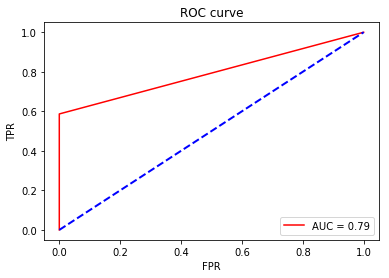

In [31]:
#Plotting the roc curve
import sklearn.metrics as metrics
probs = model.predict_proba(X_new)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y, pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [32]:
#roc score
roc_auc_score(Y, pred)

0.7933333333333333